# **Imports**

In [5]:
#imports
import os
# os.system('pip3 install pandas')
# os.system('pip3 install scikit-learn')
# os.system('pip3 install numpy')
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
#from google.colab import drive

dfpath = 'f1data'
# #get access to data via google drive
# drive.mount("/content/drive")
# dfpath = "/content/drive/My Drive/f1data/f1data"

In [9]:
print(os.path.abspath(os.getcwd()))
dfpath = os.path.abspath(os.getcwd()) + dfpath
print(dfpath)

/Users/26prakash/Desktop/CompSci/MLAI/Project_01_ML
/Users/26prakash/Desktop/CompSci/MLAI/Project_01_ML/f1data


# **Preprocessing**

In [6]:
#Function to remove all data before 2000
def removeBefore2000(dataset):
  dataset_1_9 = dataset[dataset['raceId'] < 175]
  dataset_11_24 = dataset[dataset['raceId'] >= 841]
  dataset_10 = dataset[dataset['raceId'] <= 355]
  dataset_10 = dataset_10[dataset['raceId'] >= 337]
  dataset_years = [dataset_11_24,dataset_1_9, dataset_10]
  dataset = pd.concat(dataset_years)
  return dataset

#Features: driver performance, constructor performance(strategy), car performance, previous race position, previous race at circuit position, q3 pos, q2 pos, grid pos

## **Data Categories**

### **Circuit Data**

In [5]:
circuit_data = pd.read_csv(dfpath+'/circuits.csv')
print(circuit_data.head())

   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.w

In [257]:
constructor_data = pd.read_csv(dfpath+'/constructors.csv')
for index, row in constructor_data.iterrows():
  print(row['constructorId'], row['name'])

1 McLaren
2 BMW Sauber
3 Williams
4 Renault
5 Toro Rosso
6 Ferrari
7 Toyota
8 Super Aguri
9 Red Bull
10 Force India
11 Honda
12 Spyker
13 MF1
14 Spyker MF1
15 Sauber
16 BAR
17 Jordan
18 Minardi
19 Jaguar
20 Prost
21 Arrows
22 Benetton
23 Brawn
24 Stewart
25 Tyrrell
26 Lola
27 Ligier
28 Forti
29 Footwork
30 Pacific
31 Simtek
32 Team Lotus
33 Larrousse
34 Brabham
35 Dallara
36 Fondmetal
37 March
38 Andrea Moda
39 AGS
40 Lambo
41 Leyton House
42 Coloni
44 Euro Brun
45 Osella
46 Onyx
47 Life
48 Rial
49 Zakspeed
50 RAM
51 Alfa Romeo
52 Spirit
53 Toleman
54 ATS
55 Theodore
56 Fittipaldi
57 Ensign
58 Shadow
59 Wolf
60 Merzario
61 Kauhsen
62 Rebaque
63 Surtees
64 Hesketh
65 Martini
66 BRM
67 Penske
68 LEC
69 McGuire
70 Boro
71 Apollon
72 Kojima
73 Parnelli
74 Maki
75 Embassy Hill
76 Lyncar
77 Trojan
78 Amon
79 Token
80 Iso Marlboro
81 Tecno
82 Matra
83 Politoys
84 Connew
85 Bellasi
86 De Tomaso
87 Cooper
88 Eagle
89 LDS
90 Protos
91 Shannon
92 Scirocco
93 RE
94 BRP
95 Porsche
96 Derrington
97 

### **Pit Data**

In [6]:
pit_data = pd.read_csv(dfpath+'/pit_stops.csv')
pit_data = removeBefore2000(pit_data)
print(pit_data.head())

   raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842


<ipython-input-4-cdc05d6aac37>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_10 = dataset_10[dataset['raceId'] >= 337]


### **Results Data**

In [23]:
results_data = pd.read_csv(dfpath+'/results.csv')
results_data = removeBefore2000(results_data)
results_data.tail()

/var/folders/x9/y984rskx5c15dyd3fq17kfn00000gq/T/ipykernel_79776/2640771213.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_10 = dataset_10[dataset['raceId'] >= 337]


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
20771,20774,355,32,164,20,24,20,20,20,0.0,53,\N,\N,44,21,1:46.646,187.483,12
20772,20775,355,15,205,18,19,21,21,21,0.0,51,\N,\N,42,18,1:45.979,188.663,65
20773,20776,355,10,166,24,21,\N,R,22,0.0,43,\N,\N,39,22,1:46.837,187.148,6
20774,20777,355,30,131,3,8,\N,R,23,0.0,0,\N,\N,\N,\N,\N,\N,4
20775,20778,355,24,10,15,16,\N,R,24,0.0,0,\N,\N,\N,\N,\N,\N,4


### **Race Data**

In [8]:
race_data = pd.read_csv(dfpath+'/races.csv')
#drop date, time, url, fp1 date and time, fp2 date and time, fp3 date and time, quali date and time, sprint date and time
race_data = race_data.drop(race_data.columns[[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]], axis=1)
race_data.head()
print(race_data.dtypes)
print()

#Removing all races before 2000
# race_data_1_9 = race_data[race_data['raceId'] < 175]
# race_data_11_24 = race_data[race_data['raceId'] >= 841 ]
# race_data_10 = race_data[race_data['raceId'] <= 355]
# race_data_10 = race_data_10[race_data['raceId'] >= 337]
# race_data_years = [race_data_11_24,race_data_1_9, race_data_10]
# race_data = pd.concat(race_data_years)

race_data = removeBefore2000(race_data)
print(race_data.shape)

# for index, row in race_data.iterrows():
#   if row['year'] > 2000:
#     print(row['raceId'], row['year'], row['round'])


raceId        int64
year          int64
round         int64
circuitId     int64
name         object
date         object
dtype: object

(479, 6)


<ipython-input-4-cdc05d6aac37>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_10 = dataset_10[dataset['raceId'] >= 337]


### **Qual Data**

In [9]:
qual_data = pd.read_csv(dfpath+'/qualifying.csv')
qual_data = removeBefore2000(qual_data)
qual_data.head()

<ipython-input-4-cdc05d6aac37>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_10 = dataset_10[dataset['raceId'] >= 337]


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
4535,4537,841,20,9,1,1,1:25.296,1:24.090,1:23.529
4536,4538,841,1,1,3,2,1:25.384,1:24.595,1:24.307
4537,4539,841,17,9,2,3,1:25.900,1:24.658,1:24.395
4538,4540,841,18,1,4,4,1:25.886,1:24.957,1:24.779
4539,4541,841,4,6,5,5,1:25.707,1:25.242,1:24.974


### **Driver Data**

In [ ]:
drivers = pd.read_csv(dfpath+ '/drivers.csv')
#drop number, dob, nationality, and url
drivers = drivers.drop(drivers.columns[[2, 6, 7, 8]], axis=1)
for index, row in drivers.iterrows():
  print(row['forename'], row['surname'], row['driverId'])

In [11]:
# for index, row in drivers.iterrows():
#   print(row['driverRef'], index)

### **Status Data**

In [261]:
for index, row in race_data.iterrows():
  print(row['raceId'], row['date'])

841 2011-03-27
842 2011-04-10
843 2011-04-17
844 2011-05-08
845 2011-05-22
846 2011-05-29
847 2011-06-12
848 2011-06-26
849 2011-07-10
850 2011-07-24
851 2011-07-31
852 2011-08-28
853 2011-09-11
854 2011-09-25
855 2011-10-09
856 2011-10-16
857 2011-10-30
858 2011-11-13
859 2011-11-27
860 2012-03-18
861 2012-03-25
862 2012-04-15
863 2012-04-22
864 2012-05-13
865 2012-05-27
866 2012-06-10
867 2012-06-24
868 2012-07-08
869 2012-07-22
870 2012-07-29
871 2012-09-02
872 2012-09-09
873 2012-09-23
874 2012-10-07
875 2012-10-14
876 2012-10-28
877 2012-11-04
878 2012-11-18
879 2012-11-25
880 2013-03-17
881 2013-03-24
882 2013-04-14
883 2013-04-21
884 2013-05-12
885 2013-05-26
886 2013-06-09
887 2013-06-30
888 2013-07-07
890 2013-07-28
891 2013-08-25
892 2013-09-08
893 2013-09-22
894 2013-10-06
895 2013-10-13
896 2013-10-27
897 2013-11-03
898 2013-11-17
899 2013-11-24
900 2014-03-16
901 2014-03-30
902 2014-04-06
903 2014-04-20
904 2014-05-11
905 2014-05-25
906 2014-06-08
907 2014-06-22
908 2014-0

In [100]:
statuses = pd.read_csv(dfpath+ '/status.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(statuses)


     statusId              status
0           1            Finished
1           2        Disqualified
2           3            Accident
3           4           Collision
4           5              Engine
5           6             Gearbox
6           7        Transmission
7           8              Clutch
8           9          Hydraulics
9          10          Electrical
10         11              +1 Lap
11         12             +2 Laps
12         13             +3 Laps
13         14             +4 Laps
14         15             +5 Laps
15         16             +6 Laps
16         17             +7 Laps
17         18             +8 Laps
18         19             +9 Laps
19         20            Spun off
20         21            Radiator
21         22          Suspension
22         23              Brakes
23         24        Differential
24         25         Overheating
25         26          Mechanical
26         27                Tyre
27         28         Driver Seat
28         29 

##**Transforming data into input**

In [21]:
#races in chronological order
r2000 = [i+158 for i in range(174-158+1)]
r2001 = [i+141 for i in range(157-141+1)]
r2002 = [i+124 for i in range(140-124+1)]
r2003 = [i+108 for i in range(123-108+1)]
r2004 = [i+90 for i in range(107-90+1)]
r2005 = [i+71 for i in range(89-71+1)]
r2006 = [i+53 for i in range(70-53+1)]
r2007 = [i+36 for i in range(52-36+1)]
r2008 = [i+18 for i in range(35-18+1)]
r2009 = [i+1 for i in range(17-1+1)]
r2010 =[i+337 for i in range(355-337+1)]

allRaces = []
for num in r2000:
  allRaces.append(num)
for num in r2001:
  allRaces.append(num)
for num in r2002:
  allRaces.append(num)
for num in r2003:
  allRaces.append(num)
for num in r2004:
  allRaces.append(num)
for num in r2005:
  allRaces.append(num)
for num in r2006:
  allRaces.append(num)
for num in r2007:
  allRaces.append(num)
for num in r2008:
  allRaces.append(num)
for num in r2009:
  allRaces.append(num)
for num in r2010:
  allRaces.append(num)
for i in range(1144-841+1):
  allRaces.append(i+841)
for i in range(931-918+1):
  allRaces.remove(i+918)
#remove 2012 because of bad data
for i in range(879-860+1):
  allRaces.remove(i+860)

allRaces.remove(889)
allRaces.remove(935)
allRaces.remove(946)
allRaces.remove(947)

#Get races before a raceId
def getRacesBefore(raceId):
  i = 0
  for num in allRaces:
    if raceId == num:
      return allRaces[:i]
    i = i+1
  print("race doesnt exist")
print(getRacesBefore(890))

[158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 880, 881, 882, 883, 884, 885, 886, 887, 888]


### **Drivers**

In [18]:
#driver performance rating:
#average standard deviation of lap times(are their lap times consistent?),
#percentage of points compared to teammates,
#average lap times compared to teamates,

#races driven total(experience),
#Percentage of races that DNFed that were their fault

# driversarr = []
# driverracesarr = []
# driverdnfs = []
# for index, row in results_data.iterrows():
#   if any(driver == row['driverId'] for driver in driversarr):
#       for i in range(len(driversarr)):
#         if driversarr[i] == row['driverId']:
#           driverracesarr[i] = driverracesarr[i] + 1
#   else:
#     driversarr.append(row['driverId'])
#     driverracesarr.append(1)
#     driverdnfs.append(0)
#print(driversarr)

#Gets amount of races driven
def getExperience(raceId, driverId):
  exp = 0
  races = getRacesBefore(raceId)
  #print(races)
  for race in races:
    #race2 = results_data[results_data['raceId'] == race].index[0]
    #print(race)
    drivers = results_data[results_data['raceId'] == race]['driverId'].values
    if driverId in drivers:
      exp = exp+1
  return exp

#returns 1 - crashes/amt races driven
def getReliability(raceId, driverId):
  mid = 0
  exp = 0
  races = getRacesBefore(raceId)
  for race in races:
    drivers = results_data[results_data['raceId'] == race]['driverId'].index
    for index in drivers:
      if results_data.loc[index][2] == driverId:
        exp = exp+1
        if results_data.loc[index][17] != 1:
          mid = mid+1
  if exp == 0:
    return 0.5
  else:
    return 1- (mid/exp)


#print(results_data.loc[1044][17])
#print(getReliability(1044,20))

#Get the current form of the driver
def getForm(raceId, driverId):
  score = 0
  races = getRacesBefore(raceId)
  races = races[len(races)-5:]
  #print(races)
  for race in races:
    drivers = results_data[results_data['raceId'] == race]['driverId'].index
    for index in drivers:
      if results_data.loc[index][2] == driverId:
        score = score + results_data.loc[index][9]
  return score


# for i in range(len(driversarr)):
#   idx = drivers[drivers['driverId'] == driversarr[i]].index.values
#   print(drivers._get_value(idx[0], 'forename'), drivers._get_value(idx[0], 'surname'), driverracesarr[i])

### **Qualifying**

In [128]:
#goober this wasn't even necessary check the data

#Qualifying
#Q3, Q2, and starting position
#qual_data.head()

#get the qualifying result of a particular driver at a race
# def getQualifying(raceId, driverId):
#   race_df = qual_data[qual_data['raceId'] == raceId]
#   #print(race_df)
#   position = race_df[race_df['driverId'] == driverId].index[0]
#   first = race_df[race_df['position'] == 1].index[0]
#   print(race_df)
#   print(first)
#   print(position)
#   #print(first)
#   #print(position)
#   idx = position-first
#   print(idx)
#   return race_df.iloc[idx, 5]
# def getQualifying(raceId, driverId):
#   for index, row in

# print(getQualifying(842,24))

      qualifyId  raceId  driverId  constructorId  number  position        q1  \
4557       4562     842        20              9       1         1  1:37.468   
4560       4563     842         1              1       3         2  1:36.861   
4561       4564     842        17              9       2         3  1:37.924   
4562       4565     842        18              1       4         4  1:37.033   
4563       4566     842         4              6       5         5  1:36.897   
4564       4567     842         2              4       9         6  1:37.224   
4565       4568     842        13              6       6         7  1:36.744   
4566       4569     842       808              4      10         8  1:37.210   
4567       4570     842         3            131       8         9  1:37.316   
4568       4571     842       155             15      16        10  1:36.994   
4569       4572     842        30            131       7        11  1:36.904   
4570       4573     842        67       

IndexError: index 24 is out of bounds for axis 0 with size 24

### **Constructors**

In [19]:
#constructor performance:
#Points scored by both cars the last 5 races

def getConstructorForm(raceId, constructorId):
  score = 0
  races = getRacesBefore(raceId)
  races = races[len(races)-5:]
  for race in races:
    constructor = results_data[results_data['raceId'] == race]['constructorId'].index
    for index in constructor:
      if results_data.loc[index][3] == constructorId:
        score = score + results_data.loc[index][9]
  return score

## **Getting Data into New Dataframe**

In [149]:
#columns: raceId, driverId, constructorId, driverExperience, driverReliability, driverForm, constructorForm, qualifying
#put all the data into the final dataframe
from tqdm import tqdm

df = pd.DataFrame(columns=['raceId', 'driverId', 'constructorId','driverExp', 'driverRel', 'driverForm', 'constructorForm', 'qualifying', 'position'])

for index, row in tqdm(results_data.iterrows()):
  raceId = row['raceId']
  driverId = row['driverId']
  #print(driverId)
  constructorId = row['constructorId']
  if raceId in allRaces:
    new_row = {
        'raceId': raceId,
        'driverId': driverId,
        'constructorId': constructorId,
        'driverExp' : getExperience(raceId, driverId),
        'driverRel': getReliability(raceId, driverId),
        'driverForm' : getForm(raceId, driverId),
        'constructorForm' : getConstructorForm(raceId, constructorId),
        'qualifying' : row['grid'],
        'position' : row['position']
        }
    #print(new_row)
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

print(df)


0it [00:00, ?it/s]<ipython-input-116-d3e483de031d>:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if results_data.loc[index][2] == driverId:
<ipython-input-116-d3e483de031d>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if results_data.loc[index][17] != 1:
<ipython-input-116-d3e483de031d>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if results_data.loc[index][2] == driverId:
<ipython-input-116-d3e483de031d>:67: FutureWar

KeyboardInterrupt: 

In [ ]:
# print (type(df.loc[0, 'raceId']))
# df['raceId'] = df['raceId'].str.strip('[]').astype(int)
# df['driverId'] = df['driverId'].str.strip('[]').astype(int)
# df['constructorId'] = df['constructorId'].str.strip('[]').astype(int)
# df['driverExp'] = df['driverExp'].str.strip('[]').astype(int)
# df['driverRel'] = df['driverRel'].str.strip('[]').astype(float)
# df['driverForm'] = df['driverForm'].str.strip('[]').astype(float)
# df['constructorForm'] = df['constructorForm'].str.strip('[]').astype(float)
# df.to_csv('f1dataframe.csv')

In [132]:
df.to_csv('maindataframe.csv')

# **Model**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

#import data
df= pd.read_csv(dfpath+'/f1dataframe2.csv',index_col=[0,1,2])
print(df)
#inputs/outputs
x = df.drop(['raceId','driverId','constructorId', 'position'], axis = 1)
y = df['position']

#traintest
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)


                              raceId  driverId  constructorId  driverExp  \
     Unnamed: 0.1 Unnamed: 0                                               
0    0            0              841        20              9         62   
1    1            1              841         1              1         71   
2    2            2              841       808              4         19   
3    3            3              841         4              6        159   
4    4            4              841        17              9        159   
...                              ...       ...            ...        ...   
9216 9216         9216           355        32            164         50   
9217 9217         9217           355        15            205        191   
9218 26           26              26        26             26         26   
9219 26           26              26        26             26         26   
9220 26           26              26        26             26         26   

           

In [11]:
#make the actual model
regressor = RandomForestRegressor()
#train it
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [12]:
#get r^2 score
y_pred = regressor.predict(x_test)
print(y_pred)
r2_score(y_pred,y_test)

[ 7.48        2.15        6.97       17.24166667 14.17        5.55
 26.         26.         26.          4.53        7.57       12.59
 26.         11.07        6.24       26.         12.14       26.
 14.         13.59341891 26.          3.31       26.          1.58
 26.          5.62       26.          4.26       11.33        3.46
  7.46       26.         26.          3.73        2.52        9.69
 26.          1.98        6.77        2.62       26.          9.29
  5.65       12.5075      8.4         3.1         3.58       26.
  7.44        3.16       10.8         8.8        14.37        5.93
 26.         15.6        14.89775    10.3815      7.94       16.90229365
  2.17       15.86        8.96        6.26       26.          4.38
  8.27        6.09       18.38        4.95       26.         26.
 26.          5.71       11.96        6.67       26.          9.69
  8.38       26.         10.21       26.          7.28        4.72
  9.93        6.1         4.81       13.058      26.         2

0.8657202883585766

In [13]:
mean_squared_error(y_pred,y_test)

np.float64(8.348806291981457)

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

np.float64(1.944098948481397)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.2/249.2 kB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



[notice] A new release of pip is available: 23.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Matplotlib is building the font cache; this may take a moment.


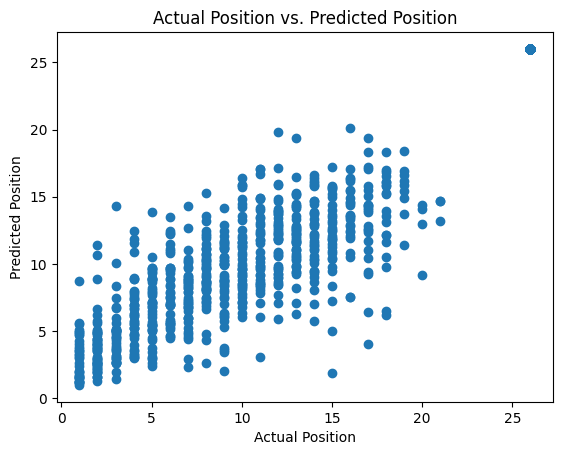

In [16]:
#os.system('pip3 install matplotlib')
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.title("Actual Position vs. Predicted Position")
plt.show()

In [25]:
#Actual prediction
#Piastri:857, Verstappen: 830, Perez:815, Norris:846,Leclerc:844, Sainz 832
#Alonso:4, Hamilton:1, Albon:848: Russel:847
driverId = 830
#Red Bull: 9, Maclaren: 1, Ferrari:6, Mercedes: 131, Williams: 3
constructorId = 9
qualifying = 2

newdf = pd.DataFrame(columns=['driverExp', 'driverRel', 'driverForm', 'constructorForm', 'qualifying'])
new_row = {
        'driverExp' : getExperience(1138, driverId),
        'driverRel': getReliability(1138, driverId),
        'driverForm' : getForm(1138, driverId),
        'constructorForm' : getConstructorForm(1138, constructorId),
        'qualifying' : qualifying
        }
newdf = pd.concat([newdf, pd.DataFrame([new_row])], ignore_index=True)
y_pred = regressor.predict(newdf)
print("Predicted Position: ", int(y_pred))


/var/folders/x9/y984rskx5c15dyd3fq17kfn00000gq/T/ipykernel_79776/443562278.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if results_data.loc[index][2] == driverId:
/var/folders/x9/y984rskx5c15dyd3fq17kfn00000gq/T/ipykernel_79776/443562278.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if results_data.loc[index][17] != 1:


Predicted Position:  3


/var/folders/x9/y984rskx5c15dyd3fq17kfn00000gq/T/ipykernel_79776/1387610449.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  newdf = pd.concat([newdf, pd.DataFrame([new_row])], ignore_index=True)
/var/folders/x9/y984rskx5c15dyd3fq17kfn00000gq/T/ipykernel_79776/1387610449.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Position: ", int(y_pred))
